# **AP155 Lab Assignment** 
## Module 4: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 20, 30, and 50 points, respectively).

_Due Date_: **5PM of November 23 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Jonabel Eleanor Baldres \
_Student No._: 2020-07278\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: December 8, 2022 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: sgd. Jonabel Eleanor Baldres** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **95**/100

Score breakdown:
* Problem 1 - 19/20
* Problem 2 - 28/30
* Problem 3 - 48/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [139]:
#importing important libraries
from numpy import zeros, sin, pi, arange, loadtxt, array, shape, exp
from numpy .fft import rfft, irfft, rfft2, irfft2
import matplotlib.pyplot as plt
import pandas as pd

### PROBLEM 1 (20 pts.; 50/50 for code & discussion) 
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(10 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(10 pts.)*


To calculate the coefficients in the discrete Fourier transforms, we use the equation

\begin{align}
  c_k = \sum_{n=0}^{N-1} y_n \exp \left( - i \frac{2 \pi k n}{N} \right)
  \end{align}

In [140]:
def dft(y): 
  '''calculates the coefficients in the discrete fourier transform'''
  N = len(y) 
  c = zeros(N//2+1, complex)
  for k in range (N//2+1):
    for n in range(N):
      c[k] += y[n] * exp(-2j*pi*k*n/N) # calculates the coefficients
  return c

In [141]:
#given constants
N = 1000
n = arange(N)

y = sin(pi * n/N) * sin(20*pi*n/N) #given function
c = dft(y) #calculates the DFT of the given function

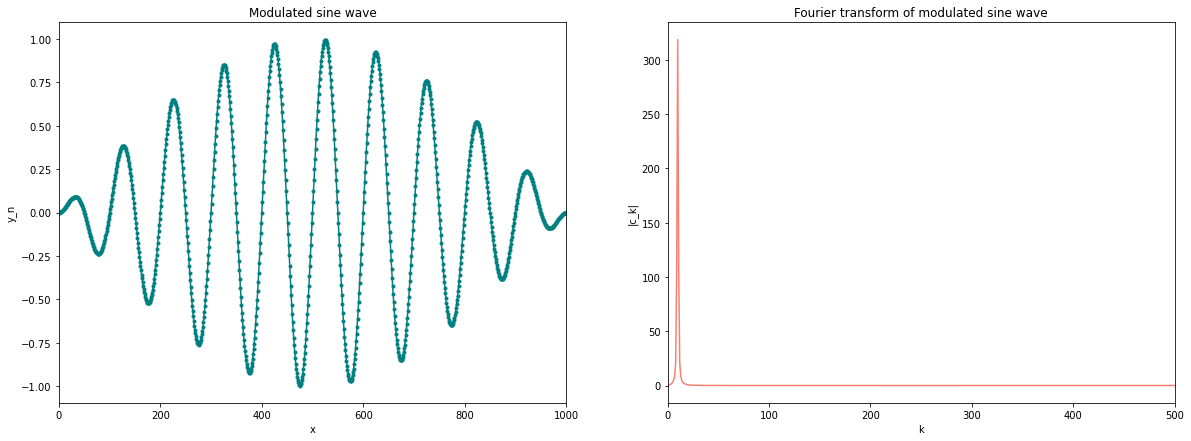

In [142]:
#plotting
fig,ax = plt.subplots(1,2, figsize=(20,7))

#modulated sine wave
ax[0].plot(y, color = 'teal', marker = ".")
ax[0].set_ylabel("y_n")
ax[0].set_xlabel("x")
ax[0].set_xlim(0,1000)
ax[0].set_title("Modulated sine wave")

#FT of modulated sine wave
ax[1].plot(abs(c), color = 'salmon')
ax[1].set_ylabel('|c_k|')
ax[1].set_xlabel('k')
ax[1].set_xlim(0,500)
ax[1].set_title("Fourier transform of modulated sine wave")
plt.show()

The first figure shows the wave-like shape of the function given. On the other hand, the second figure shows only one noticeable spike in the plot which represents a large magnitude of $c_k$. 

### PROBLEM 2 (30 pts.; 50/50 for code & discussion)

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(5 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(10 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(5 pts.)* 

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(10 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [143]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [144]:
file_path = "/content/drive/My Drive/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [145]:
dow = loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
``` 

In [146]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

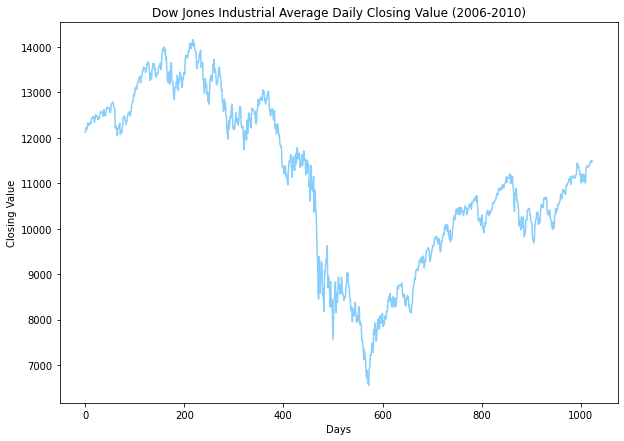

In [147]:
#plotting the data on graph
#notice that we need not input the value for x since its default values are the range of the length of y
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(dow, color = 'lightskyblue')
plt.xlabel("Days")
plt.ylabel("Closing Value")
plt.title("Dow Jones Industrial Average Daily Closing Value (2006-2010)")
plt.show()

Shown above is the raw data of the given file.

In [148]:
d = array(dow) #converting the values of dow into array
e = array(rfft(d)) #using the function rfft and converting it into array and storing it as a variable e
x = arange(len(e)) 

df = pd.DataFrame(
    {'x': x,
     'y': e,
    })
df.index += 1
df

,x,y
1,0,1.128390e+07+0.000000e+00j
2,1,6.841277e+05-9.550875e+05j
3,2,-4.192262e+05+9.290896e+04j
4,3,7.419015e+04-2.738123e+05j
5,4,-3.518568e+04+7.236586e+04j
...,...,...
509,508,-2.883139e+03+2.236797e+03j
510,509,2.977724e+03-4.027967e+02j
511,510,-1.543240e+03+6.998795e+02j
512,511,3.804006e+03-3.068279e+02j


Shown above are the coefficients of the discrete Fourier transform. 

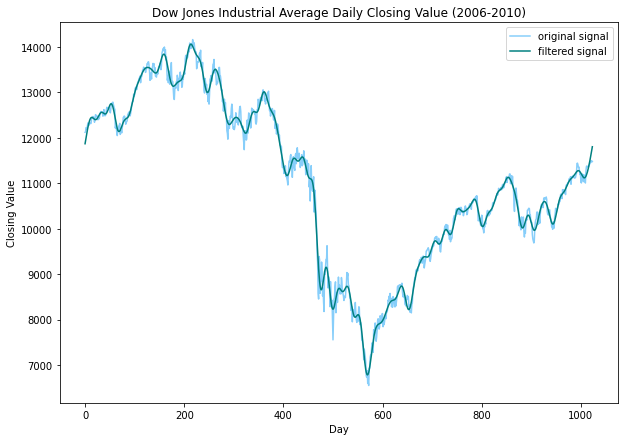

In [149]:
e[51:] = 0 #assigning the last 90% to 0
c = array(e) #storing it as variable c
d1 = array(irfft(c)) #using the function irfft and converting it into array and storing it as a variable d1

# plotting
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(d, color = 'lightskyblue', label = 'original signal')
plt.plot(d1, color = 'teal', label = 'filtered signal')
plt.xlabel("Day")
plt.ylabel("Closing Value")
plt.title('Dow Jones Industrial Average Daily Closing Value (2006-2010)')
plt.legend()
plt.show()

From above, we can see that even if the filtered signal follows the shape of the original signal, the filtered signal has lesser noise. In addition, even if we used only the first 10% of the coefficients, the inverse provided the original length of the data. Moreover, setting more coefficients to zero lessens the similariy of the original and filtered signal. 

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Real-world Application: Image deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

Similar to what you did for Problem 2, you need to make a copy of the file $\tt blur.txt$ and save it to the same folder in your **own Google Drive** where you saved $\tt dow.txt$. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:
```
blur = np.loadtxt(file_path+"blur.txt")
``` 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

3. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. *(20 pts.)*

   Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very
large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it-- just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$. 

In [150]:
blur = loadtxt(file_path+"blur.txt")

In [151]:
blur[0:10]

array([[672.56065, 672.34187, 672.13208, ..., 673.27256, 673.02586,
        672.7886 ],
       [682.04729, 681.85582, 681.67331, ..., 682.67747, 682.45793,
        682.24793],
       [691.51404, 691.34926, 691.19339, ..., 692.06431, 691.87135,
        691.688  ],
       ...,
       [738.0515 , 738.01005, 737.97719, ..., 738.23142, 738.1618 ,
        738.10195],
       [747.10293, 747.08407, 747.0737 , ..., 747.21488, 747.16792,
        747.13074],
       [756.03825, 756.04126, 756.05266, ..., 756.0843 , 756.05933,
        756.04412]])

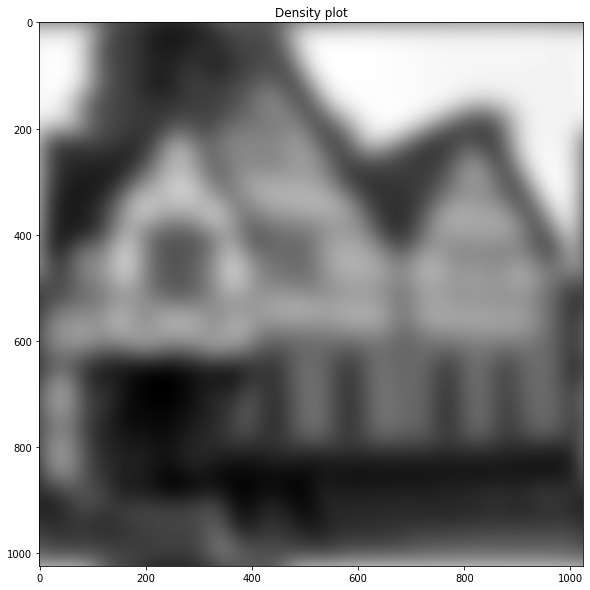

In [152]:
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(blur, cmap = 'gray') #plotting the image on the screen with a color map gray as preference
plt.title("Density plot")
plt.show()

In [153]:
print("The shape of the image is " + str(shape(blur)))

The shape of the image is (1024, 1024)


In [154]:
#constants
sigma = 25

def gauss(x,y, h, k):
  '''defining the Gaussian function'''
  return exp(-((x-h)**2 + (y-k)**2)/(2 * sigma**2))

In [155]:
psf =zeros((shape(blur))) #assigning storage of the values of gaussian function
blurred_array = array(blur) #turning the given data into array

for x in arange(len(blurred_array)): #xvalues
  for y in arange(len(blurred_array)): #yvalues
    #adding the sum of the values below to the psf array
    psf[x,y] += gauss(x,y,0,0) #lowermost left
    psf[x,y] += gauss(x,y,0,1024) #lowermost right
    psf[x,y] += gauss(x,y,1024,0) #uppermost left
    psf[x,y] += gauss(x,y,1024,1024) #uppermost right

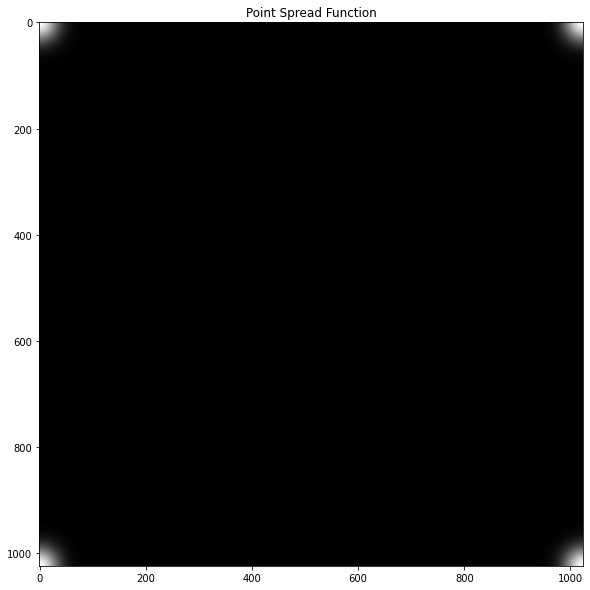

In [156]:
#plotting the point spread function
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(psf, cmap= 'gray')
plt.title('Point Spread Function')
plt.show()

The graph above resembles the graph provided in the Newman text. The graph contains bright patches in each corners. 

In [157]:
blur_ft = array(rfft2(blurred_array)) #applying fast fourier transform to blurred_array and making sure that it passes as an array and storing it as blur_ft
psf_ft = array(rfft2(psf)) #applying fast fourier transform to the point spread function
epsilon = 10e-3 #if psf_ft is greater than 10e-3, blur_ft is divided by psf_ft

unblur = zeros((shape(psf_ft)), dtype = 'complex')

for x in range(shape(psf_ft)[0]):
  for y in range(shape(psf_ft)[1]):
    if psf_ft[x,y] < epsilon:
      unblur[x,y] = blur_ft[x,y]
    else:
      unblur[x,y] = blur_ft[x,y]/ psf_ft[x,y]


In [163]:
blur_ft = array(rfft2(blurred_array)) #applying fast fourier transform to blurred_array and making sure that it passes as an array and storing it as blur_ft
psf_ft = array(rfft2(psf)) #applying fast fourier transform to the point spread function
epsilon = 10e-3 #if psf_ft is greater than 10e-3, blur_ft is divided by psf_ft

unblur = zeros((shape(psf_ft)), dtype = 'complex')

for x in range(shape(psf_ft)[0]):
  for y in range(shape(psf_ft)[1]):
    if psf_ft[x,y] < epsilon:
      unblur[x,y] = blur_ft[x,y]
    else:
      unblur[x,y] = blur_ft[x,y]/ psf_ft[x,y]

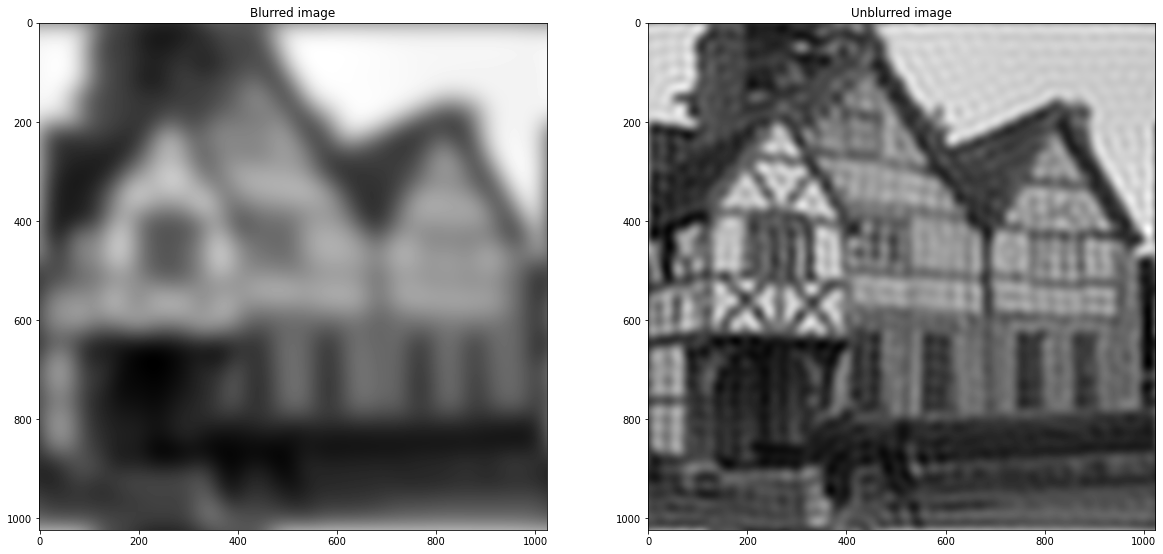

In [164]:
fig, ax = plt.subplots(1,2, figsize = (20,20))
ax[0].imshow(blur, cmap="gray")
ax[0].set_title("Blurred image")
ax[1].imshow(irfft2(unblur), cmap="gray")
ax[1].set_title("Unblurred image")
plt.show()

The first figure is the original blurred image while the second figure is the unblurred image. The second figure is not that sharp since we only used the given gaussian function with a sigma of 25. Experimenting on the possible sigma values can help unblur the image further. 